## Импорт библиотек

In [205]:
import numpy as np
import pandas as pd
import warnings
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

pd.options.display.max_columns = 100

%matplotlib inline

warnings.filterwarnings('ignore')

## Чтение данных

In [206]:
data = pd.read_csv('input/train.csv')

## Разбиение данных на train и valid

In [207]:
train, valid = train_test_split(data, test_size=0.3, random_state=100)

In [208]:
# проверим что получилось
train.shape

(7000, 20)

In [209]:
valid.shape

(3000, 20)

## Обработка данных

In [210]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7000 entries, 1191 to 5640
Data columns (total 20 columns):
Id               7000 non-null int64
DistrictId       7000 non-null int64
Rooms            7000 non-null float64
Square           7000 non-null float64
LifeSquare       5506 non-null float64
KitchenSquare    7000 non-null float64
Floor            7000 non-null int64
HouseFloor       7000 non-null float64
HouseYear        7000 non-null int64
Ecology_1        7000 non-null float64
Ecology_2        7000 non-null object
Ecology_3        7000 non-null object
Social_1         7000 non-null int64
Social_2         7000 non-null int64
Social_3         7000 non-null int64
Healthcare_1     3643 non-null float64
Helthcare_2      7000 non-null int64
Shops_1          7000 non-null int64
Shops_2          7000 non-null object
Price            7000 non-null float64
dtypes: float64(8), int64(9), object(3)
memory usage: 1.1+ MB


In [211]:
train.head(10)

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2,Price
1191,13182,1,3.0,81.107658,NaN,1.0,10,17.0,1977,0.007122,B,B,1,264,0,NaN,0,1,B,250381.580780
4458,10195,27,3.0,50.841082,34.225561,8.0,7,12.0,2013,0.072158,B,B,2,629,1,NaN,0,0,A,143545.018507
1131,9055,53,2.0,52.301049,33.105796,8.0,4,12.0,1975,0.049637,B,B,34,7759,0,229.0,1,3,B,270794.714055
9562,2819,52,2.0,68.935850,NaN,0.0,16,17.0,1977,0.371149,B,B,34,7065,1,750.0,2,5,B,168600.632600
6579,16504,27,1.0,72.486741,58.944462,20.0,6,6.0,2017,0.075424,B,B,11,3097,0,NaN,0,0,B,195520.319385
4201,8695,15,1.0,55.808087,25.429775,11.0,9,17.0,2009,0.158249,B,B,21,5731,0,NaN,1,0,B,194706.291204
138,14901,31,2.0,62.301292,30.388569,10.0,11,12.0,2008,0.151346,B,A,32,5889,10,830.0,4,1,B,427526.003615
9407,15458,33,1.0,33.270136,NaN,0.0,4,12.0,1977,0.236108,B,B,16,3893,27,NaN,3,10,B,149263.256276
5327,4851,1,1.0,39.314342,NaN,1.0,13,17.0,1977,0.007122,B,B,1,264,0,NaN,0,1,B,137782.941940
6815,11347,8,1.0,42.751560,22.932048,7.0,8,17.0,2011,0.458174,B,A,26,4439,1,1130.0,1,5,B,175771.383549


In [212]:
train.describe()

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Price
count,7000.000000,7000.000000,7000.000000,7000.000000,5506.000000,7000.000000,7000.000000,7000.000000,7.000000e+03,7000.000000,7000.000000,7000.000000,7000.000000,3643.000000,7000.000000,7000.000000,7000.000000
mean,8410.561000,50.488857,1.885857,56.139213,36.101743,6.425000,8.524571,12.594857,4.849509e+03,0.119962,24.625000,5337.612714,8.031143,1140.695855,1.324429,4.223143,213385.700273
std,4879.331157,43.318590,0.825182,21.581506,21.050678,33.997518,5.215978,6.625610,2.396436e+05,0.118762,17.561659,4017.982639,23.879440,1019.049275,1.502687,4.819939,92032.495105
min,2.000000,0.000000,0.000000,1.136859,0.370619,0.000000,1.000000,0.000000,1.910000e+03,0.000000,0.000000,168.000000,0.000000,30.000000,0.000000,0.000000,59174.778028
25%,4167.500000,21.000000,1.000000,41.743594,22.718846,1.000000,4.000000,9.000000,1.974000e+03,0.019509,6.000000,1564.000000,0.000000,350.000000,0.000000,1.000000,153833.380281
50%,8450.500000,37.000000,2.000000,52.235120,32.622329,6.000000,7.000000,13.000000,1.977000e+03,0.075779,25.000000,5261.000000,2.000000,900.000000,1.000000,3.000000,191509.081005
75%,12664.250000,75.000000,2.000000,65.814194,45.032632,9.000000,12.000000,17.000000,2.001000e+03,0.195781,36.000000,7227.000000,5.000000,1548.000000,2.000000,6.000000,248229.104597
max,16798.000000,209.000000,10.000000,641.065193,638.163193,2014.000000,37.000000,99.000000,2.005201e+07,0.521867,74.000000,19083.000000,141.000000,4849.000000,6.000000,23.000000,633233.466570


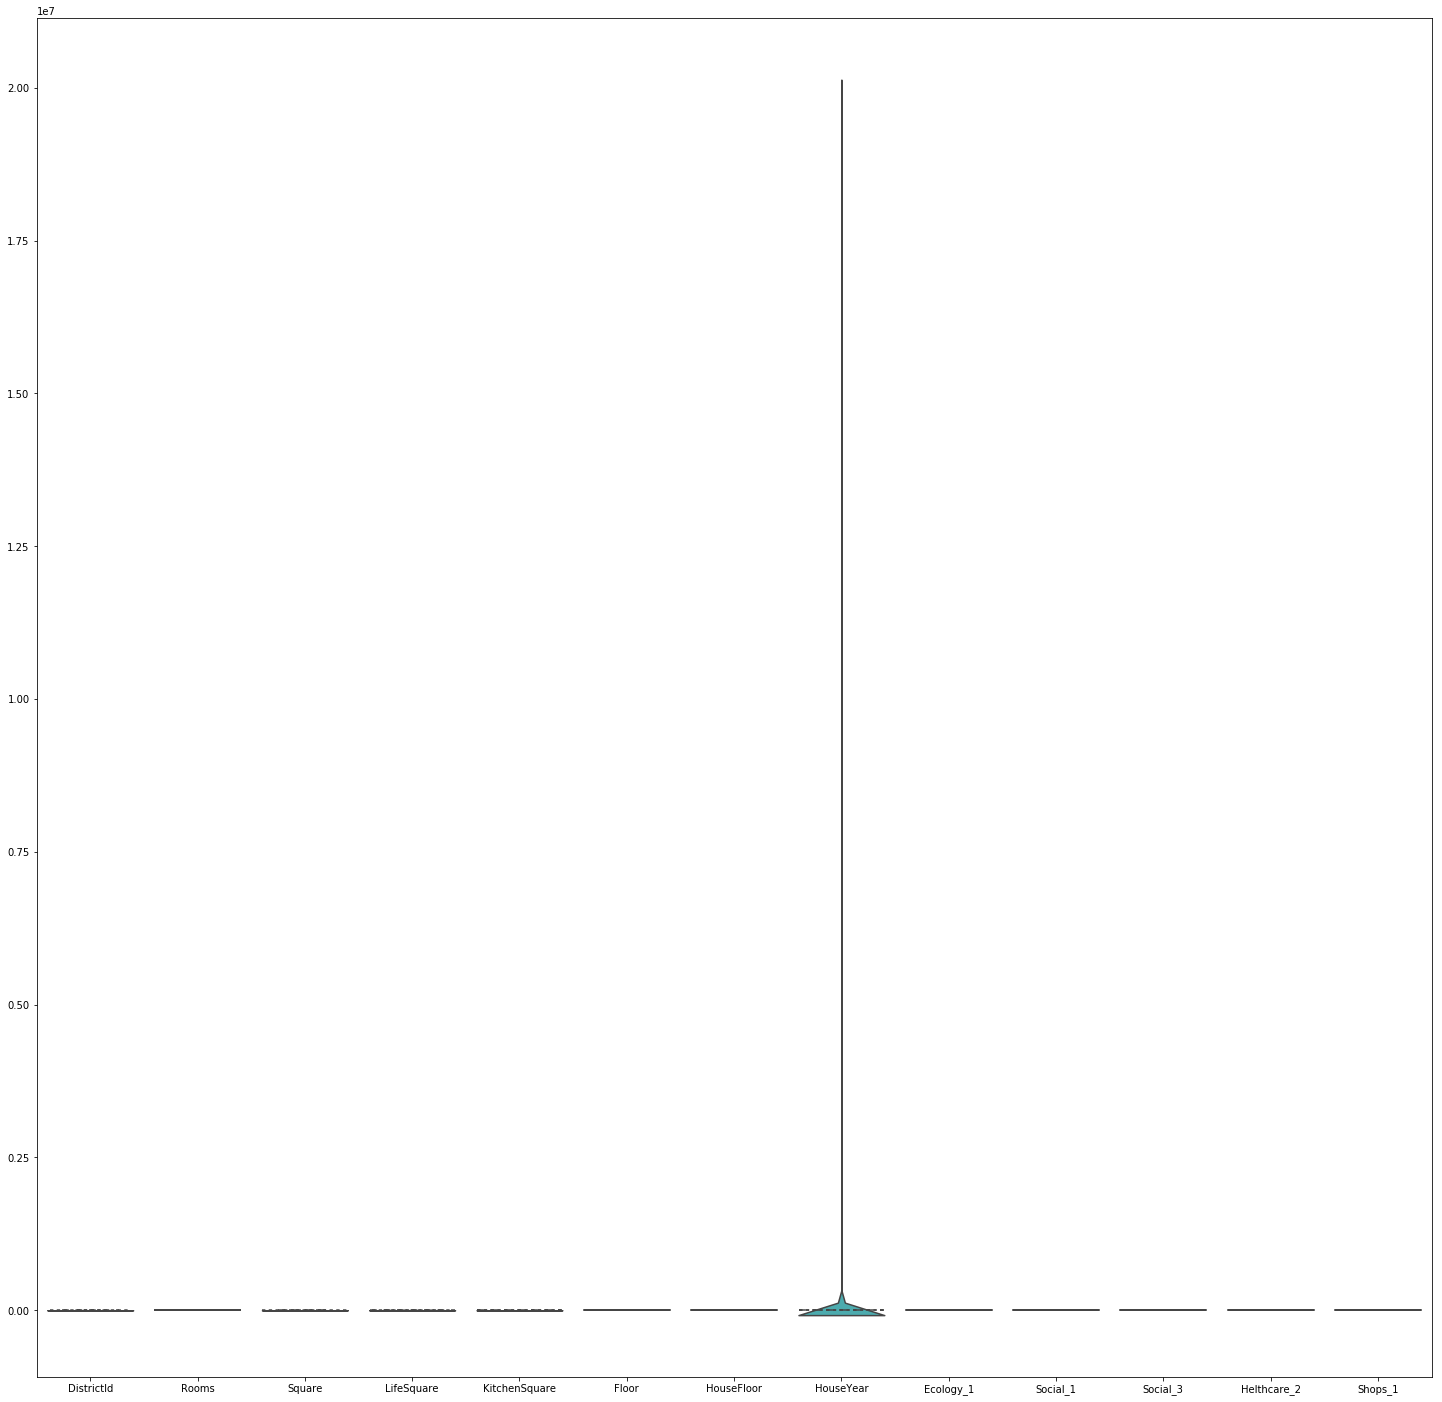

In [213]:
plt.figure(figsize=(25,25))
sns.violinplot(data=train[['DistrictId', 'Rooms', 'Square', 'LifeSquare', 'KitchenSquare',
       'Floor', 'HouseFloor', 'HouseYear', 'Ecology_1', 'Social_1',
       'Social_3', 'Helthcare_2', 'Shops_1']], scale='width', inner='quartile')
plt.show()

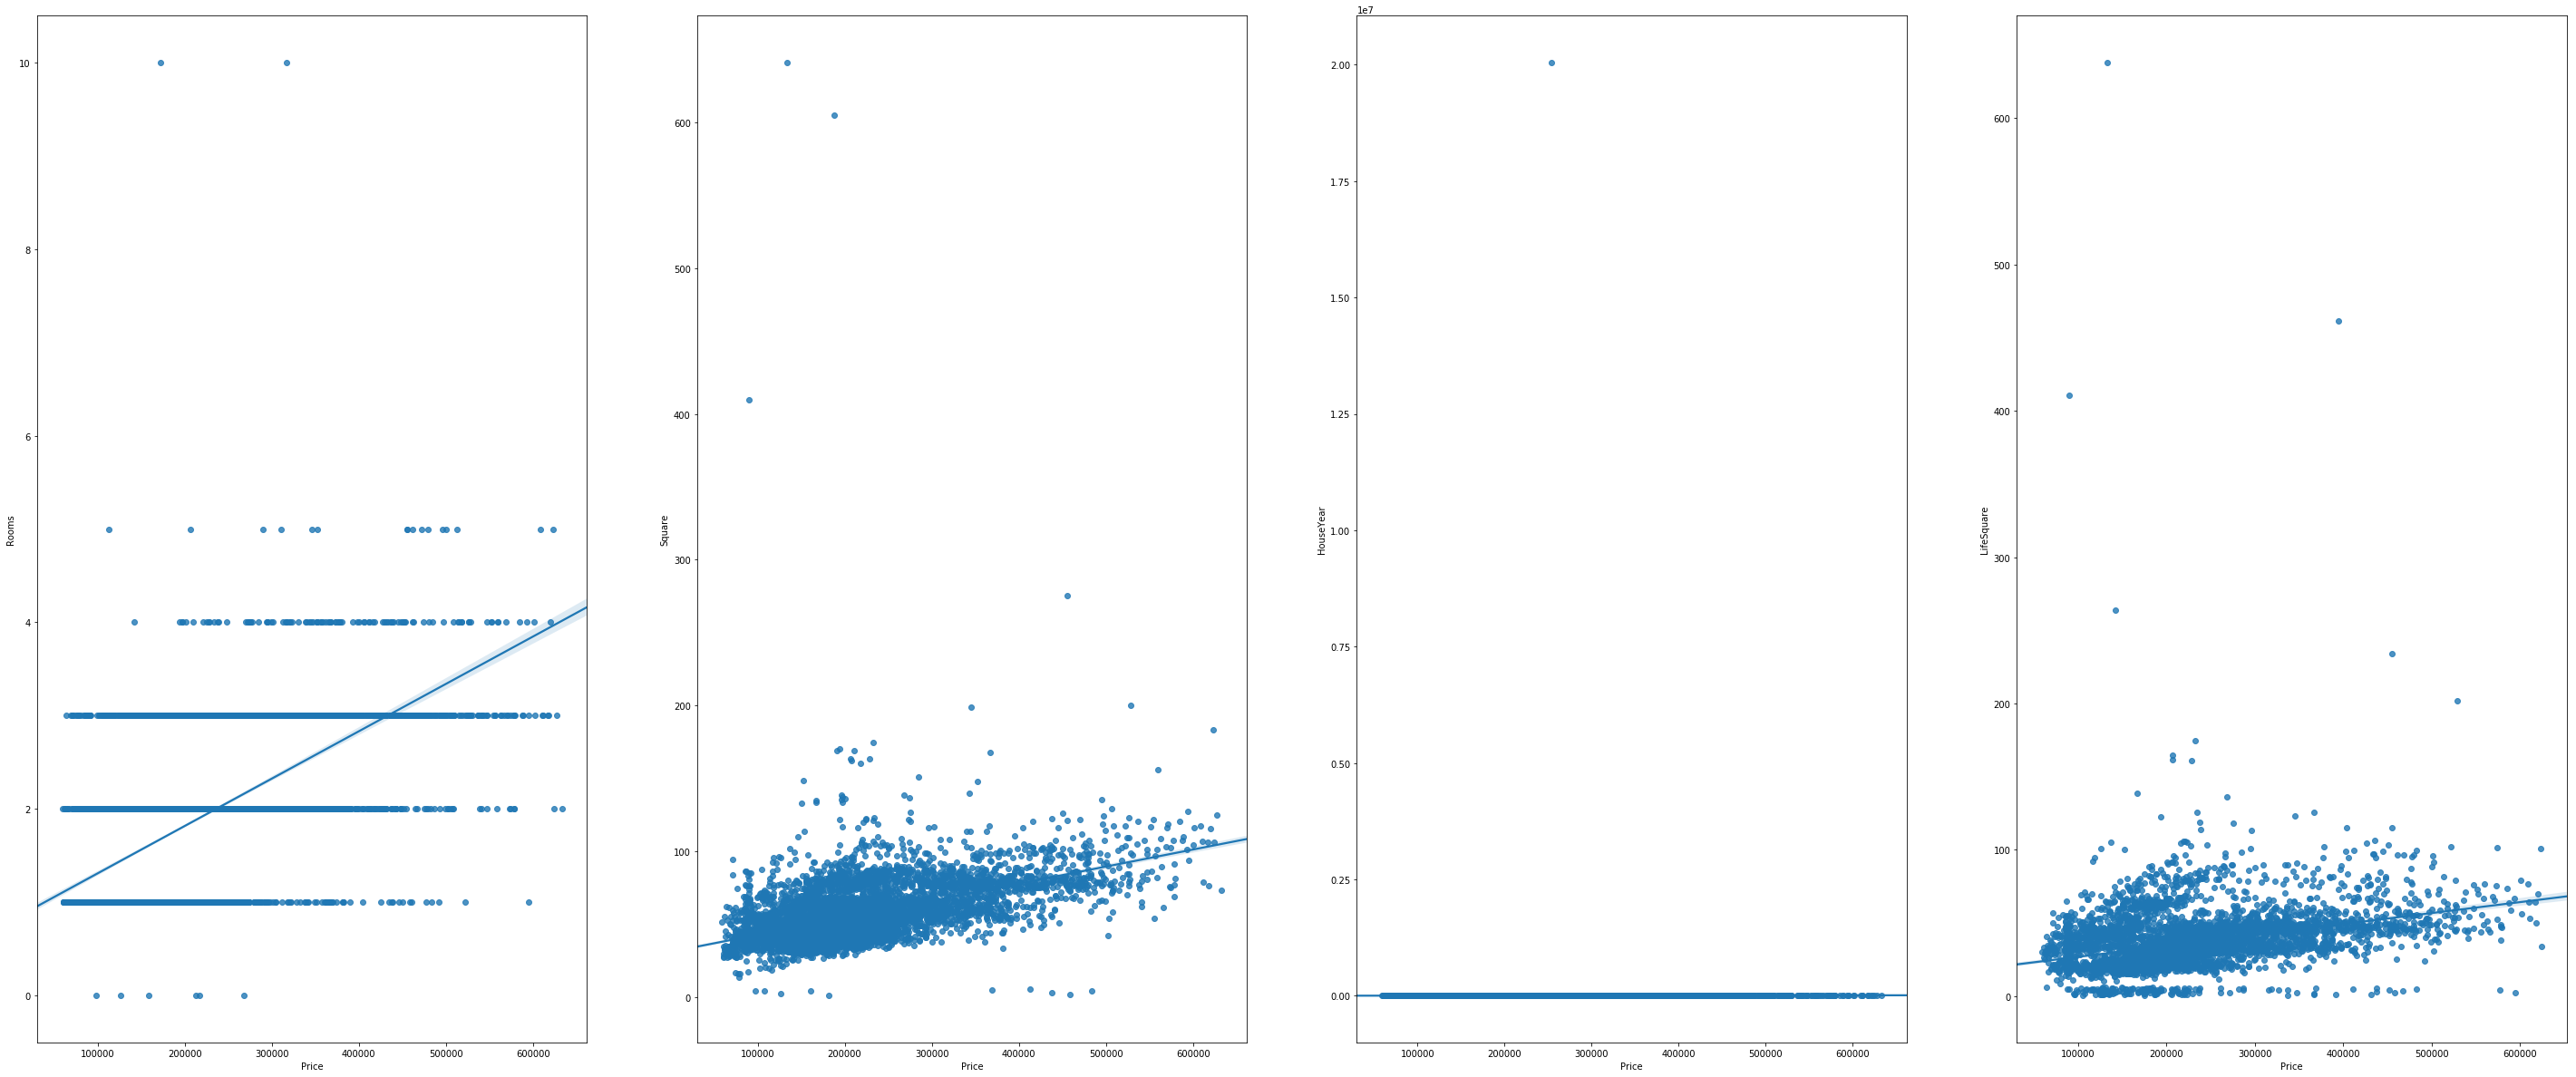

In [214]:
def make_scatter(df):
    feats = ('Rooms', 'Square', 'HouseYear', 'LifeSquare')
    
    for index, feat in enumerate(feats):
        plt.subplot(len(feats)/4+1, 4, index+1)
        ax = sns.regplot(x = 'Price', y = feat, data = df)

plt.figure(figsize = (50, 50))
plt.subplots_adjust(hspace = 0.4)

make_scatter(train)

In [215]:
train.columns

Index(['Id', 'DistrictId', 'Rooms', 'Square', 'LifeSquare', 'KitchenSquare',
       'Floor', 'HouseFloor', 'HouseYear', 'Ecology_1', 'Ecology_2',
       'Ecology_3', 'Social_1', 'Social_2', 'Social_3', 'Healthcare_1',
       'Helthcare_2', 'Shops_1', 'Shops_2', 'Price'],
      dtype='object')

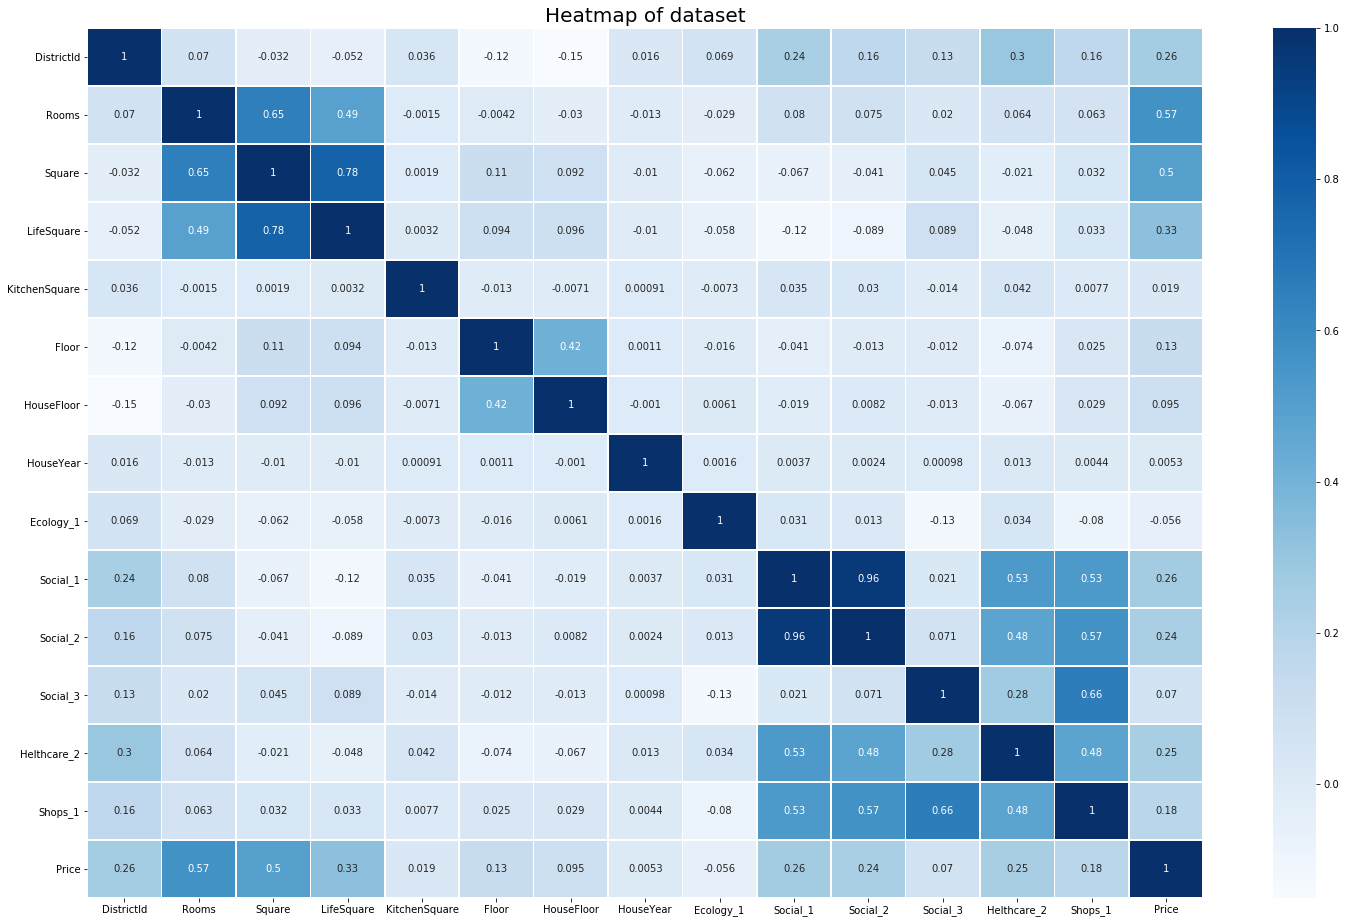

In [216]:
plt.rcParams['figure.figsize']=(25,16)
hm=sns.heatmap(train[['DistrictId', 'Rooms', 'Square', 'LifeSquare', 'KitchenSquare',
       'Floor', 'HouseFloor', 'HouseYear', 'Ecology_1', 'Social_1', 'Social_2',
       'Social_3', 'Helthcare_2', 'Shops_1', 
        'Price']].corr(), annot = True, linewidths=.5, cmap='Blues')
hm.set_title(label='Heatmap of dataset', fontsize=20)
hm;

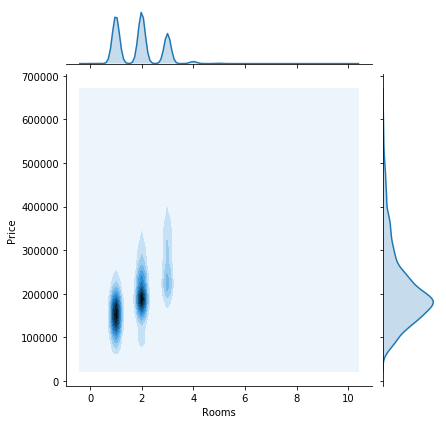

In [217]:
sns.jointplot(train['Rooms'], train['Price'], kind='kde');

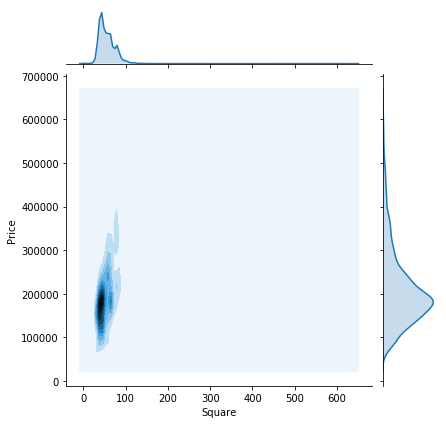

In [218]:
sns.jointplot(train['Square'], train['Price'], kind='kde');

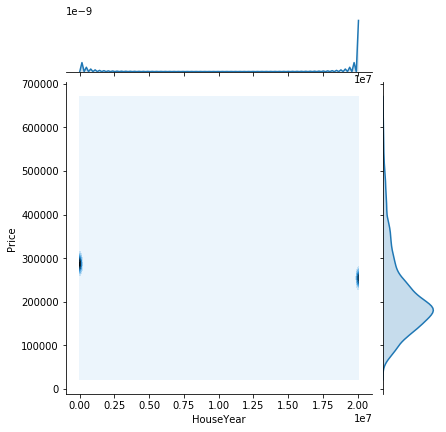

In [219]:
sns.jointplot(train['HouseYear'], train['Price'], kind='kde');

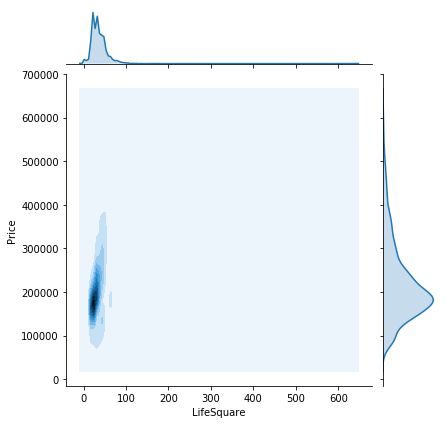

In [220]:
sns.jointplot(train['LifeSquare'], train['Price'], kind='kde');

Данные показывают выбросы, потому необходимо данные обработать

## Чистка данных

In [221]:
def fillna_life_square(df):
    k = np.mean(df['LifeSquare'] / df ['Square']) 
    df['LifeSquare'] = df['LifeSquare'].fillna(df['Square'] * k)
    return df

In [222]:
def prepare_square(df, col):
    df.loc[df[col] < 15, col] = 15
    df.loc[df[col] > 200, col] = 200
    return df

In [223]:
def prepare_rooms(df):
    df.loc[df['Rooms'] > 5, 'Rooms'] = 5
    return df

In [224]:
def prepare_year(df):
    df.loc[df['HouseYear'] > 2018, 'HouseYear'] = 2018
    return df

In [225]:
stat1 = train.groupby(['DistrictId', 'Rooms'], as_index=False)[['Price']].mean().rename(columns={'Price':'mean_price_dr'})

In [226]:
stat2 = train.groupby('Rooms', as_index=False)[['Price']].mean().rename(columns={'Price':'mean_price_r'})

In [227]:
mean_price = train['Price'].mean()

In [228]:
distr_info1 = train['DistrictId'].value_counts().reset_index().\
    rename(columns={'index':'DistrictId', 'DistrictId':'large_district'})

In [229]:
def add_distr_info(df, distr_info1 = distr_info1):
    df = pd.merge(df, distr_info1, on='DistrictId', how='left')
    df['large_district'] = df['large_district'].fillna(1)
    return df

In [230]:
def add_mean_price(df, stat1, stat2, mean_price):
    df = pd.merge(df, stat1, on=['DistrictId', 'Rooms'], how='left')
    df = pd.merge(df, stat2, on='Rooms', how='left')
    
    df['mean_price_r'] = df['mean_price_r'].fillna(mean_price)
    df['mean_price_dr'] = df['mean_price_dr'].fillna(df['mean_price_r'])
    return df

In [231]:
def prepare_data(df, stat1=stat1, stat2=stat2, mean_price=mean_price, distr_info1 = distr_info1):
    # df.drop('Healthcare_1', axis=1, inplace=True)
    df = pd.get_dummies(df)
    df = prepare_rooms(df)
    df = prepare_square(df, 'Square')
    df = prepare_square(df, 'LifeSquare')
    df = prepare_square(df, 'KitchenSquare')
    df = prepare_year(df)
    df = add_distr_info(df, distr_info1)
    df = fillna_life_square(df)
    df = add_mean_price(df, stat1, stat2, mean_price)
    df['DistrictId'] = df['DistrictId'].astype('category')
    return df

In [232]:
train = prepare_data(train)

In [233]:
train.head()

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Price,Ecology_2_A,Ecology_2_B,Ecology_3_A,Ecology_3_B,Shops_2_A,Shops_2_B,large_district,mean_price_dr,mean_price_r
0,13182,1,3.0,81.107658,53.073347,15.0,10,17.0,1977,0.007122,1,264,0,NaN,0,1,250381.580780,0,1,0,1,0,1,448,242920.318313,288183.829856
1,10195,27,3.0,50.841082,34.225561,15.0,7,12.0,2013,0.072158,2,629,1,NaN,0,0,143545.018507,0,1,0,1,1,0,611,210532.678647,288183.829856
2,9055,53,2.0,52.301049,33.105796,15.0,4,12.0,1975,0.049637,34,7759,0,229.0,1,3,270794.714055,0,1,0,1,0,1,124,257896.225214,214622.517478
3,2819,52,2.0,68.935850,45.108641,15.0,16,17.0,1977,0.371149,34,7065,1,750.0,2,5,168600.632600,0,1,0,1,0,1,103,177466.581911,214622.517478
4,16504,27,1.0,72.486741,58.944462,20.0,6,6.0,2017,0.075424,11,3097,0,NaN,0,0,195520.319385,0,1,0,1,0,1,611,121865.415028,159775.950796


In [234]:
train.describe()

,Id,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Price,Ecology_2_A,Ecology_2_B,Ecology_3_A,Ecology_3_B,Shops_2_A,Shops_2_B,large_district,mean_price_dr,mean_price_r
count,7000.000000,7000.000000,7000.000000,7000.000000,7000.000000,7000.000000,7000.000000,7000.000000,7000.000000,7000.000000,7000.000000,7000.000000,3643.000000,7000.000000,7000.000000,7000.000000,7000.000000,7000.000000,7000.000000,7000.000000,7000.000000,7000.000000,7000.000000,7000.000000,7000.000000
mean,8410.561000,1.884429,55.993934,36.866161,15.252714,8.524571,12.594857,1984.792429,0.119962,24.625000,5337.612714,8.031143,1140.695855,1.324429,4.223143,213385.700273,0.010571,0.989429,0.027000,0.973000,0.082429,0.917571,169.658000,213435.063093,213435.063093
std,4879.331157,0.815402,18.958635,16.694333,4.449073,5.215978,6.625610,18.425537,0.118762,17.561659,4017.982639,23.879440,1019.049275,1.502687,4.819939,92032.495105,0.102280,0.102280,0.162095,0.162095,0.275036,0.275036,189.333275,74448.680716,53255.522228
min,2.000000,0.000000,15.000000,15.000000,15.000000,1.000000,0.000000,1910.000000,0.000000,0.000000,168.000000,0.000000,30.000000,0.000000,0.000000,59174.778028,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,84250.557673,159775.950796
25%,4167.500000,1.000000,41.743594,24.596799,15.000000,4.000000,9.000000,1974.000000,0.019509,6.000000,1564.000000,0.000000,350.000000,0.000000,1.000000,153833.380281,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,38.000000,164851.012028,159775.950796
50%,8450.500000,2.000000,52.235120,33.405550,15.000000,7.000000,13.000000,1977.000000,0.075779,25.000000,5261.000000,2.000000,900.000000,1.000000,3.000000,191509.081005,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,71.000000,198178.403168,214622.517478
75%,12664.250000,2.000000,65.814194,45.018155,15.000000,12.000000,17.000000,2001.000000,0.195781,36.000000,7227.000000,5.000000,1548.000000,2.000000,6.000000,248229.104597,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,349.000000,249949.755494,214622.517478
max,16798.000000,5.000000,200.000000,200.000000,200.000000,37.000000,99.000000,2018.000000,0.521867,74.000000,19083.000000,141.000000,4849.000000,6.000000,23.000000,633233.466570,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,611.000000,622888.825328,417567.167490


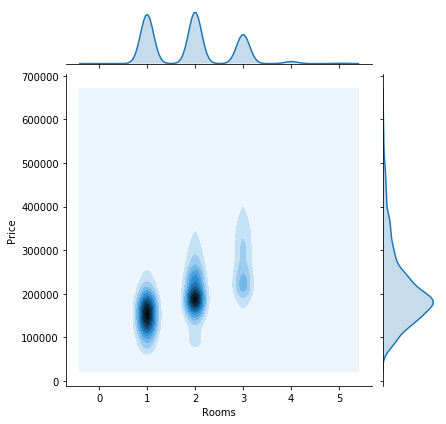

In [235]:
sns.jointplot(train['Rooms'], train['Price'], kind='kde');

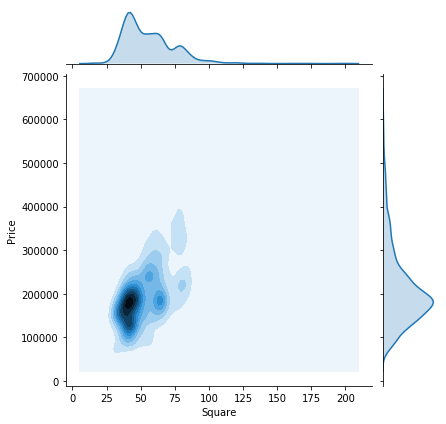

In [236]:
sns.jointplot(train['Square'], train['Price'], kind='kde');

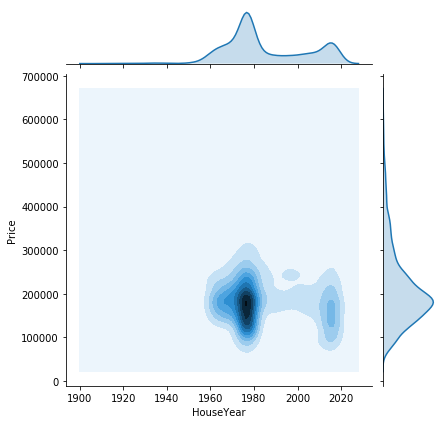

In [237]:
sns.jointplot(train['HouseYear'], train['Price'], kind='kde');

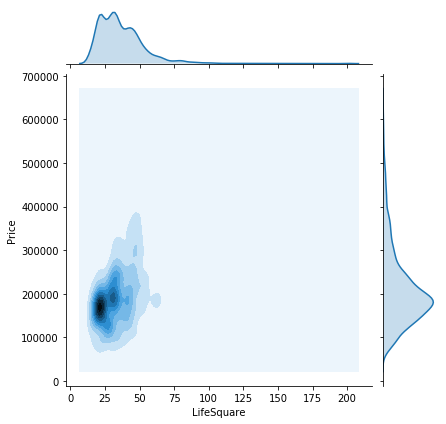

In [238]:
sns.jointplot(train['LifeSquare'], train['Price'], kind='kde');

In [239]:
valid = prepare_data(valid)

## Построение моделей

### Пробуем модель случайный лес

In [240]:
from sklearn.ensemble import RandomForestRegressor as RF

In [255]:
model = RF(n_estimators=250, max_depth=14, max_features = 10, random_state=42)

In [256]:
from sklearn.metrics import r2_score as r2

In [257]:
from sklearn.metrics import mean_squared_error as mse

In [258]:
train.columns

Index(['Id', 'DistrictId', 'Rooms', 'Square', 'LifeSquare', 'KitchenSquare',
       'Floor', 'HouseFloor', 'HouseYear', 'Ecology_1', 'Social_1', 'Social_2',
       'Social_3', 'Healthcare_1', 'Helthcare_2', 'Shops_1', 'Price',
       'Ecology_2_A', 'Ecology_2_B', 'Ecology_3_A', 'Ecology_3_B', 'Shops_2_A',
       'Shops_2_B', 'large_district', 'mean_price_dr', 'mean_price_r'],
      dtype='object')

In [259]:
feats = ['DistrictId', 'Rooms', 'Square', 'LifeSquare', 'KitchenSquare',
       'Floor', 'HouseFloor', 'HouseYear', 'Ecology_1', 'Social_1', 'Social_2',
       'Social_3', 'Helthcare_2', 'Shops_1', 
       'Ecology_2_A', 'Ecology_2_B', 'Ecology_3_A', 'Ecology_3_B', 'Shops_2_A',
       'Shops_2_B', 'large_district', 'mean_price_dr', 'mean_price_r']

In [260]:
model.fit(train.loc[:, feats], train['Price'])

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=14,
           max_features=10, max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=250, n_jobs=None, oob_score=False, random_state=42,
           verbose=0, warm_start=False)

In [261]:
def evaluate_model(df, model=model, feats=feats, calculate_r2='Yes', calculate_mse='Yes'):
    pred = model.predict(df.loc[:, feats])
    if calculate_r2 == 'Yes':
        r2_ = r2(df['Price'], pred)
        print('R2: {}'.format(r2_))
    if calculate_mse == 'Yes':
        mse_ = mse(df['Price'], pred)
        print('MSE: {}'.format(mse_))
    return pred

In [262]:
pred_train = evaluate_model(train)

R2: 0.9467873665339015
MSE: 450645562.33430177


In [263]:
pred_valid = evaluate_model(valid)

R2: 0.7048382102919435
MSE: 2651475505.5873084


In [250]:
from sklearn.model_selection import GridSearchCV

In [251]:
parameters = [{'n_estimators': [150, 200, 250], 
               'max_features': np.arange(7, 23, 3),
               'max_depth': np.arange(5, 20, 3)}]

In [252]:
grid = GridSearchCV(estimator=RF(random_state=42), 
                   param_grid=parameters,
                   scoring='r2',
                   cv=5)

In [253]:
grid.fit(train.loc[:, feats], train['Price'])

GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators='warn', n_jobs=None,
           oob_score=False, random_state=42, verbose=0, warm_start=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid=[{'n_estimators': [150, 200, 250], 'max_features': array([ 7, 10, 13, 16, 19, 22]), 'max_depth': array([ 5,  8, 11, 14, 17])}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='r2', verbose=0)

In [254]:
grid.best_params_

{'max_depth': 14, 'max_features': 10, 'n_estimators': 250}

### Пробуем модель линейная регрессия

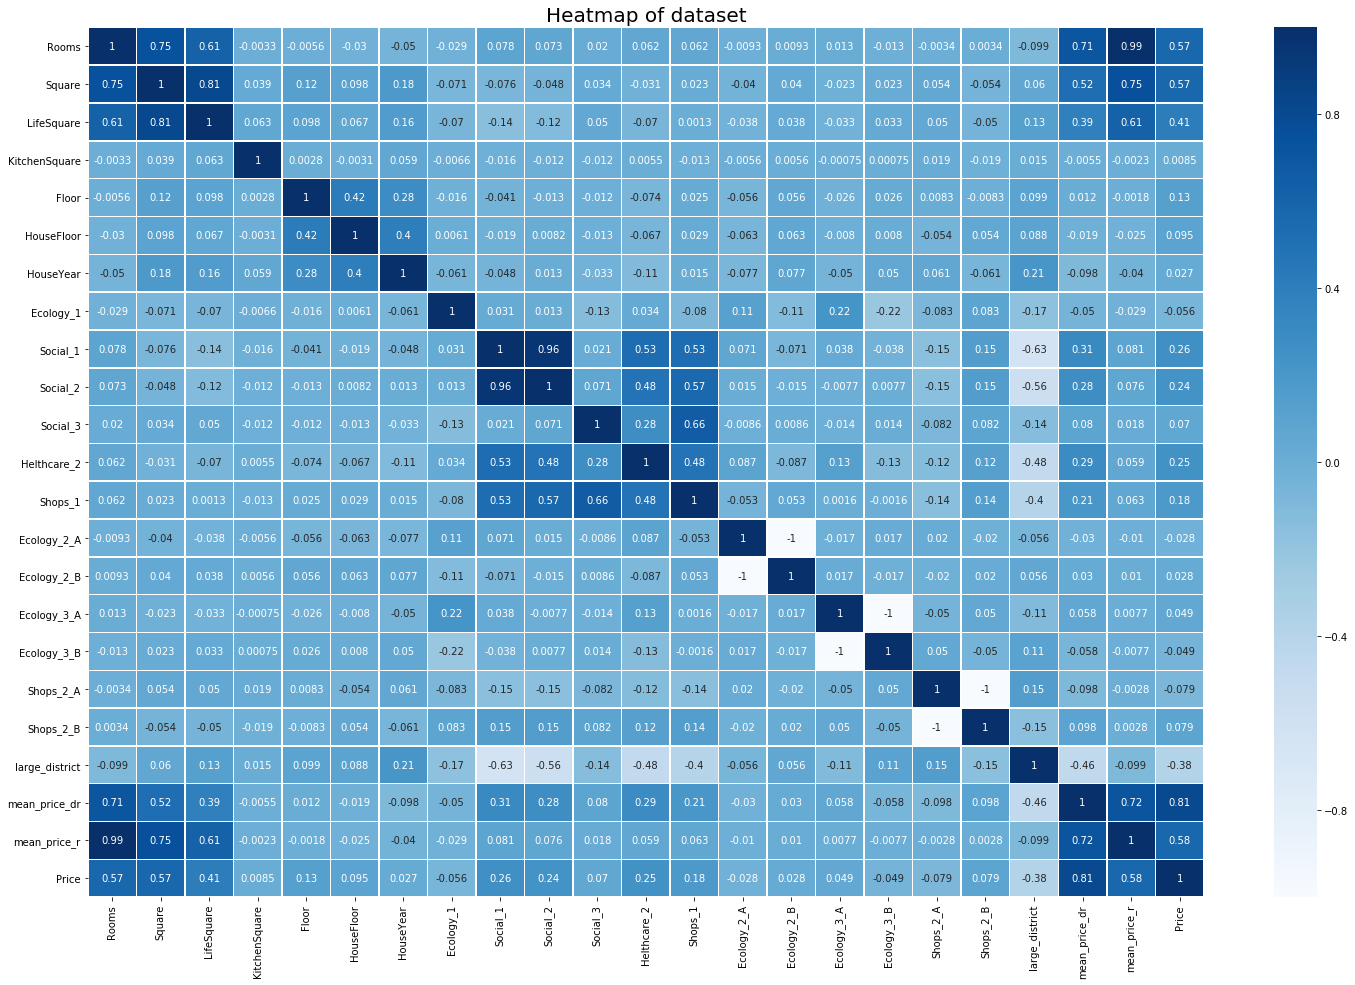

In [264]:
plt.rcParams['figure.figsize']=(25,16)
hm=sns.heatmap(train[['DistrictId', 'Rooms', 'Square', 'LifeSquare', 'KitchenSquare',
       'Floor', 'HouseFloor', 'HouseYear', 'Ecology_1', 'Social_1', 'Social_2',
       'Social_3', 'Helthcare_2', 'Shops_1', 
       'Ecology_2_A', 'Ecology_2_B', 'Ecology_3_A', 'Ecology_3_B', 'Shops_2_A',
       'Shops_2_B', 'large_district', 'mean_price_dr', 'mean_price_r', 
        'Price']].corr(), annot = True, linewidths=.5, cmap='Blues')
hm.set_title(label='Heatmap of dataset', fontsize=20)
hm;

In [265]:
from sklearn.linear_model import LinearRegression                                                                 

In [266]:
lr = LinearRegression()

##### Для линейной регресии выбираем только те признаки, которые имеют наибольшую корреляцию с ценой

In [267]:
lr_feats = ['Rooms', 'Square', 'LifeSquare', 
       'Social_1', 'Social_2',
       'Helthcare_2', 'large_district', 'mean_price_dr', 'mean_price_r']

In [268]:
lr.fit(train.loc[:, lr_feats], train['Price'])

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [269]:
pred_train_lr = evaluate_model(train, model=lr, feats=lr_feats)

R2: 0.7117343982419576
MSE: 2441255125.7898374


In [270]:
pred_valid_lr = evaluate_model(valid, model=lr, feats=lr_feats)

R2: 0.6046286177548983
MSE: 3551670887.5832853


#### Ввиду того, что случайный лес дает более высокие показатели, выбираем этот метод для окончательного расчета

## Обработка и чистка данных test

In [271]:
test = pd.read_csv('input/test.csv')

In [272]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 19 columns):
Id               5000 non-null int64
DistrictId       5000 non-null int64
Rooms            5000 non-null float64
Square           5000 non-null float64
LifeSquare       3959 non-null float64
KitchenSquare    5000 non-null float64
Floor            5000 non-null int64
HouseFloor       5000 non-null float64
HouseYear        5000 non-null int64
Ecology_1        5000 non-null float64
Ecology_2        5000 non-null object
Ecology_3        5000 non-null object
Social_1         5000 non-null int64
Social_2         5000 non-null int64
Social_3         5000 non-null int64
Healthcare_1     2623 non-null float64
Helthcare_2      5000 non-null int64
Shops_1          5000 non-null int64
Shops_2          5000 non-null object
dtypes: float64(7), int64(9), object(3)
memory usage: 742.3+ KB


In [273]:
test = prepare_data(test)

In [274]:
test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5000 entries, 0 to 4999
Data columns (total 25 columns):
Id                5000 non-null int64
DistrictId        5000 non-null category
Rooms             5000 non-null float64
Square            5000 non-null float64
LifeSquare        5000 non-null float64
KitchenSquare     5000 non-null float64
Floor             5000 non-null int64
HouseFloor        5000 non-null float64
HouseYear         5000 non-null int64
Ecology_1         5000 non-null float64
Social_1          5000 non-null int64
Social_2          5000 non-null int64
Social_3          5000 non-null int64
Healthcare_1      2623 non-null float64
Helthcare_2       5000 non-null int64
Shops_1           5000 non-null int64
Ecology_2_A       5000 non-null uint8
Ecology_2_B       5000 non-null uint8
Ecology_3_A       5000 non-null uint8
Ecology_3_B       5000 non-null uint8
Shops_2_A         5000 non-null uint8
Shops_2_B         5000 non-null uint8
large_district    5000 non-null float64


In [275]:
test.describe()

,Id,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Ecology_2_A,Ecology_2_B,Ecology_3_A,Ecology_3_B,Shops_2_A,Shops_2_B,large_district,mean_price_dr,mean_price_r
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,2623.000000,5000.00000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000
mean,8412.595400,1.907200,56.459804,37.120311,15.174600,8.632000,12.601000,1984.383400,0.119874,24.933800,5406.900000,8.262600,1146.657263,1.31940,4.242800,0.009600,0.990400,0.029800,0.970200,0.082400,0.917600,164.496800,213904.024642,214797.961411
std,4832.674037,0.810382,18.972591,16.199903,3.642632,5.483228,6.789213,18.556144,0.120070,17.532202,4026.614773,23.863762,1044.744231,1.47994,4.777365,0.097518,0.097518,0.170052,0.170052,0.275001,0.275001,186.618581,72019.187099,53324.322914
min,1.000000,0.000000,15.000000,15.000000,15.000000,1.000000,0.000000,1908.000000,0.000000,0.000000,168.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,84250.557673,159775.950796
25%,4221.750000,1.000000,41.906231,24.806299,15.000000,4.000000,9.000000,1973.000000,0.019509,6.000000,1564.000000,0.000000,325.000000,0.00000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,34.000000,165958.564709,159775.950796
50%,8320.500000,2.000000,52.921340,33.786306,15.000000,7.000000,12.000000,1977.000000,0.072158,25.000000,5285.000000,2.000000,900.000000,1.00000,3.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,69.000000,198178.403168,214622.517478
75%,12598.250000,2.000000,66.285129,45.351547,15.000000,12.000000,17.000000,2000.000000,0.195781,36.000000,7287.000000,5.000000,1548.000000,2.00000,6.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,349.000000,246680.243049,214622.517478
max,16795.000000,5.000000,200.000000,200.000000,200.000000,78.000000,99.000000,2018.000000,0.521867,74.000000,19083.000000,141.000000,4849.000000,6.00000,23.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,611.000000,569110.210440,417567.167490


## Предсказание на данных test и запись в файл

In [276]:
test['Price'] = evaluate_model(test, calculate_r2='No', calculate_mse='No')

In [277]:
test.loc[:, ['Id', 'Price']].to_csv('AKudaibergenov_predictions.csv', index=None)